https://www.kaggle.com/datasets/jishnukoliyadan/taiwan-default-credit-card-clients




$\color{red}{\text{1. Explore}}$

1. 
  1. $\color{red}{\text{Load the dataset and use only column "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", and "default payment next month".}}$

In [1]:
from google.colab import files
uploaded = files.upload()

Saving default_of_credit_card_clients.csv to default_of_credit_card_clients.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns

In [3]:
df = pd.read_csv(io.BytesIO(uploaded['default_of_credit_card_clients.csv']))
df1 = df[['LIMIT_BAL', 'SEX','EDUCATION','MARRIAGE','AGE','default payment next month']]
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
0,20000,2,2,1,24,1
1,120000,2,2,2,26,1
2,90000,2,2,2,34,0
3,50000,2,2,1,37,0
4,50000,1,2,1,57,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   default payment next month  30000 non-null  int64
dtypes: int64(6)
memory usage: 1.4 MB


1. 
  2.  $\color{red}{\text{identify the categorical features: SEX, MARRIAGE,EDUCATION why? }}$ because sex represent female(2), male(1). So there are only two values for this variable, thus treat it as categorical. MARRIAGE represent marriage status, 1 = married; 2 = single; 3 = others, so treat this column as categorical. EDUCATION represent education level, 1 = graduate school; 2 = university; 3 = high school; 4 = others. Same reasoning as previous two columns.

 

In [5]:
df1["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [6]:
df1["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [7]:
df1["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

1. 
  3. $\color{red}{\text{produce the pairwise scatter plot among the column we choose}}$

In [8]:
df2 = df[['LIMIT_BAL','AGE']]

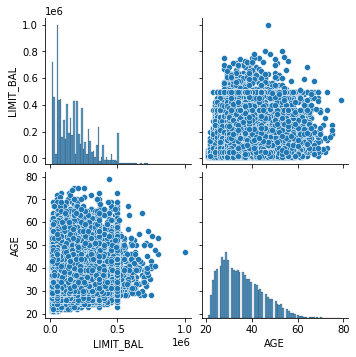

In [9]:
#only doing scatterplot between numerical columns and y variables
sns.pairplot(df2)

In [10]:
#checking the data if any row contains null value 
null_rows_idx = df1["MARRIAGE"].isnull()
df1[null_rows_idx] 
#we find it is a clean dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month


In [11]:
# splitting data now and prepare to build a pipeline and fit randomforestclassifer
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df1, test_size = .20, random_state=0)

train_data.shape, test_data.shape

((24000, 6), (6000, 6))

In [12]:
train_data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,167730.986667,1.601167,1.851083,1.553125,35.459542,0.222458
std,129482.396255,0.489669,0.788046,0.521238,9.191371,0.415906
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,1.000000


In [13]:
#checking whether the y value column only contains 0/1 value
train_data["default payment next month"].value_counts()

0    18661
1     5339
Name: default payment next month, dtype: int64

In [28]:
df1_labels = df1["default payment next month"].copy()

$\color{red}{\text{2. Prepare a pipeline}}$

 2. 
  1. $\color{red}{\text{standardize the numeric attributes}}$
  

In [14]:
#feature scaling using standardscaler
from sklearn.preprocessing import StandardScaler
df1_num = df1.select_dtypes(include=[np.number])
std_scaler = StandardScaler()
df1_num_std_scaled = std_scaler.fit_transform(df1_num)

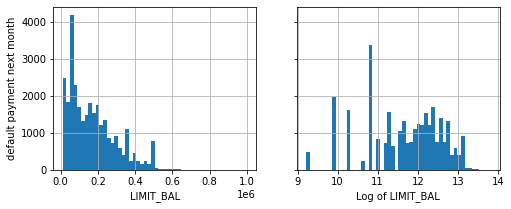

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df1["LIMIT_BAL"].hist(ax=axs[0], bins=50)
df1["LIMIT_BAL"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("LIMIT_BAL")
axs[1].set_xlabel("Log of LIMIT_BAL")
axs[0].set_ylabel("default payment next month")
plt.show()

In [17]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(df1[["LIMIT_BAL"]])

In [18]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

2. 
  2. $\color{red}{\text{expand the categorical attributes to columns of 0/1 variables}}$

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

set_config(display='diagram')

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [20]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False, drop="if_binary"))
    ])

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_attribs = ["LIMIT_BAL", "AGE"]
cat_attribs = ["SEX","MARRIAGE","EDUCATION"]
SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

preprocess_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['LIMIT_BAL', 'AGE']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False))]),
                                 ['SEX', 'MARRIAGE', 'EDUCATION'])])

In [53]:
full_pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('svm', SVC()),
])

full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['SEX', 'MARRIAGE',
                                                   'EDUCATION'])])),
                ('svm', SVC())])

In [22]:
train_data.head()
df_X = train_data.drop("default payment next month", axis=1)
df_y = train_data["default payment next month"]
print(df_X.head())

X_train = preprocess_pipeline.fit_transform(df_X)
y_train = df_y.values
preprocess_pipeline.get_feature_names_out()

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE
3225       20000    2          3         1   44
11815     260000    2          2         2   30
7338       20000    1          2         1   39
14980      30000    1          2         1   23
27167      10000    1          2         1   29


array(['num__LIMIT_BAL', 'num__AGE', 'cat__SEX_2', 'cat__MARRIAGE_0',
       'cat__MARRIAGE_1', 'cat__MARRIAGE_2', 'cat__MARRIAGE_3',
       'cat__EDUCATION_0', 'cat__EDUCATION_1', 'cat__EDUCATION_2',
       'cat__EDUCATION_3', 'cat__EDUCATION_4', 'cat__EDUCATION_5',
       'cat__EDUCATION_6'], dtype=object)

2. 
  3. $\color{red}{\text{fit a RandomForestClassifier classifier}}$

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
y_test = test_data["default payment next month"]
X_test = preprocess_pipeline.transform(test_data)
y_pred = forest_clf.predict(X_test)
accuracy_score(test_data["default payment next month"], y_pred)

0.7331666666666666

In [32]:
balanced_accuracy_score(test_data["default payment next month"], y_pred).round(4)

0.5258

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4191  512]
 [1089  208]]


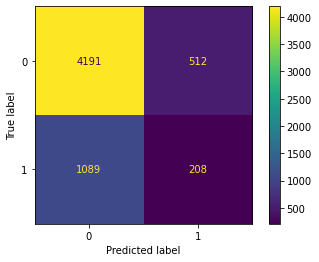

In [34]:
import matplotlib
from sklearn.metrics import ConfusionMatrixDisplay
#display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [35]:
from sklearn.metrics import classification_report
#classification_report() gives class by class precision, recall, and f-measure, along with the averages over all the classes
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      4703
           1       0.29      0.16      0.21      1297

    accuracy                           0.73      6000
   macro avg       0.54      0.53      0.52      6000
weighted avg       0.68      0.73      0.70      6000



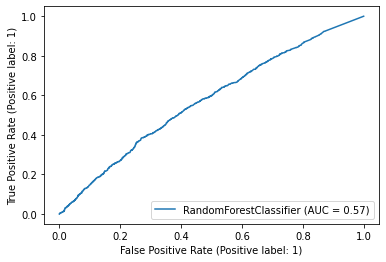

In [36]:
from sklearn.metrics import RocCurveDisplay
#ROC Curve
RocCurveDisplay.from_estimator(forest_clf, X_test, y_test);

In [37]:
from sklearn.model_selection import cross_val_score
#cross validation for more reliable estimate of how good our model is on new data
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring='balanced_accuracy')
forest_scores.mean().round(3)

0.524

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
#using a pipeline to make the preprocessing, training, and testing streamlined
lr_pipe = make_pipeline(preprocess_pipeline, LogisticRegression())
# we have to use data frames here because the preprocessing step expects them.
lr_scores = cross_val_score(lr_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')
lr_scores.mean().round(3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.5

In [41]:
from sklearn.neighbors import KNeighborsClassifier
#replace with knn 
knn_pipe = make_pipeline(preprocess_pipeline, KNeighborsClassifier())
knn_scores = cross_val_score(knn_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')
knn_scores.mean().round(2)

0.52

In [43]:
from sklearn.svm import SVC
#replace with SVC
svc_pipe = make_pipeline(preprocess_pipeline, SVC(gamma="auto"))
svc_scores = cross_val_score(svc_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')
svc_scores.mean().round(2)

0.5

In [44]:
from sklearn.ensemble import RandomForestClassifier
#replace with randomforest
rf_pipe = make_pipeline(preprocess_pipeline, RandomForestClassifier(n_estimators=100, random_state=42))
rf_scores = cross_val_score(rf_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')
rf_scores.mean().round(2)

0.52

3. $\color{red}{\text{Grid Search(1st)}}$

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

full_pipeline = Pipeline([
    ("preprocessing", preprocess_pipeline),
    ("random_forest", RandomForestClassifier(n_estimators=100, random_state=42)),
])
param_grid = [ 
    {'random_forest__max_depth': [2, 5, 10], 
    'random_forest__min_samples_leaf': [2, 5, 10], 
    'random_forest__max_features': ["sqrt", "log2", None]}, 
    ]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='balanced_accuracy')
grid_search.fit(df_X, df_y)

grid_search.best_estimator_
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
24,1.643667,0.023560,0.104825,0.000377,10,None,2,"{'random_forest__max_depth': 10, 'random_fores...",0.505938,0.505164,0.504567,0.505223,0.000561,1
25,1.611198,0.027271,0.106284,0.001313,10,None,5,"{'random_forest__max_depth': 10, 'random_fores...",0.504614,0.506489,0.503564,0.504889,0.001210,2
26,1.594998,0.022523,0.105262,0.000078,10,None,10,"{'random_forest__max_depth': 10, 'random_fores...",0.502447,0.505128,0.504731,0.504102,0.001181,3
21,0.643918,0.009719,0.102781,0.004117,10,log2,2,"{'random_forest__max_depth': 10, 'random_fores...",0.501042,0.500840,0.500881,0.500921,0.000087,4
18,0.649866,0.007664,0.099245,0.000831,10,sqrt,2,"{'random_forest__max_depth': 10, 'random_fores...",0.501042,0.500840,0.500881,0.500921,0.000087,4


3. $\color{red}{\text{RandomizedSearch(2nd)}}$

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

full_pipeline = Pipeline([
    ("preprocessing", preprocess_pipeline),
    ("random_forest", RandomForestClassifier(n_estimators=100, random_state=42)),
])
param_distribs = [ 
    {'random_forest__max_depth': randint(2, 100), 
    'random_forest__min_samples_leaf': randint(2, 100), 
    'random_forest__max_features': ["sqrt", "log2", None]}, 
    ]
random_search = RandomizedSearchCV(full_pipeline, param_distribs, n_iter=20, cv=3, 
                                 scoring='balanced_accuracy', random_state=42)
random_search.fit(df_X, df_y)
random_search.best_estimator_
cv_res = pd.DataFrame(random_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
17,0.808914,0.025875,0.130918,0.001327,91,sqrt,3,"{'random_forest__max_depth': 91, 'random_fores...",0.509347,0.504642,0.505201,0.506397,0.002099,1
15,1.043332,0.245967,0.145043,0.025725,40,log2,5,"{'random_forest__max_depth': 40, 'random_fores...",0.504254,0.500998,0.499515,0.501589,0.001979,2
18,1.393831,0.001146,0.099525,0.000668,85,None,61,"{'random_forest__max_depth': 85, 'random_fores...",0.500000,0.501082,0.500000,0.500361,0.000510,3
19,0.659131,0.006396,0.103039,0.001404,72,sqrt,9,"{'random_forest__max_depth': 72, 'random_fores...",0.500000,0.500521,0.500120,0.500214,0.000223,4
16,0.631322,0.010774,0.098632,0.000779,90,log2,10,"{'random_forest__max_depth': 90, 'random_fores...",0.500000,0.500602,0.500000,0.500201,0.000284,5


3. $\color{red}{\text{Halving Grid Search(3rd)}}$



In [ ]:
param_grid = [ 
    {'svm__C': np.logspace(-3, 3, 4), 
     'svm__gamma': np.logspace(-2, 2, 5)
     }, 
    ]
# Check what's in this parameter grid
print('The parameter grid : ')
print(param_grid)

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, 
                                 scoring='balanced_accuracy')
grid_search.fit(df_X, df_y)
print('\n\nThe best parameters are ', grid_search.best_params_)

grid_cv_res = pd.DataFrame(grid_search.cv_results_) # convert to DF for convenience
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)  # sort the data frame
# select only the columns that start with 'param_' and the 'column mean_test_score'
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

The parameter grid : 
[{'svm__C': array([1.e-03, 1.e-01, 1.e+01, 1.e+03]), 'svm__gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}]


In [57]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [ 
    {'svm__C': np.logspace(-3, 3, 4), 
     'svm__gamma': np.logspace(-2, 2, 5)
     }, 
    ]
# Check what's in this parameter grid
print('The parameter grid : ')
print(param_grid)

# Change to Halving strategy starting here
halving_grid_search = HalvingGridSearchCV(full_pipeline, param_grid, cv=3, 
                                    min_resources='exhaust', # use all data in the last round, back calculate to determine how much to start with
                                    scoring='balanced_accuracy')
halving_grid_search.fit(df_X, df_y)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  # convert to DF for convenience
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
# and check the top few rows
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(6)

0.4969057320838799

4. 
Let's assume that the cost of missing a default (i.e., predicting non-default for a customer who ended up defaulting) is $\color{red}{\text{10}}$ times the cost of flagging a non-defaulter as defaulter. Let's define a custom scoring function that we'll use instead of the balanced accuracy.


In [38]:
from sklearn.metrics import make_scorer, confusion_matrix
def default_cost(y_true, y_pred): 
  cm = confusion_matrix(y_true, y_pred)
  return cm[1,0] * 10 + cm[0,1] * 1

cost_scorer = make_scorer(default_cost, greater_is_better=False)

forest_costs = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring=cost_scorer)
forest_costs.mean()

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring=cost_scorer)
grid_search.fit(df_X, df_y)

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
24,1.609657,0.014491,0.106360,0.002343,10,None,2,"{'random_forest__max_depth': 10, 'random_fores...",-17469.0,-17430.0,-17522.0,-17473.666667,37.703522,1
25,1.582916,0.024783,0.105399,0.001179,10,None,5,"{'random_forest__max_depth': 10, 'random_fores...",-17544.0,-17394.0,-17567.0,-17501.666667,76.708684,2
26,1.565078,0.020006,0.106069,0.001883,10,None,10,"{'random_forest__max_depth': 10, 'random_fores...",-17649.0,-17502.0,-17572.0,-17574.333333,60.035175,3
21,0.758294,0.075497,0.112188,0.010517,10,log2,2,"{'random_forest__max_depth': 10, 'random_fores...",-17712.0,-17731.0,-17737.0,-17726.666667,10.656245,4
18,0.636388,0.012859,0.099055,0.001162,10,sqrt,2,"{'random_forest__max_depth': 10, 'random_fores...",-17712.0,-17731.0,-17737.0,-17726.666667,10.656245,4
